c:\Users\sw_ya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Summary of the data set
                 0            1            2            3            4  \
count  6475.000000  6475.000000  6475.000000  6475.000000  6475.000000   
mean      2.587578    15.027188    -0.909819     0.013164     0.026899   
std       1.374857     1.265892     0.859317     0.461456     0.577740   
min       0.000000    12.605500    -2.680260    -1.000000    -0.999979   
25%       1.432830    14.152850    -1.567890    -0.000268    -0.173605   
50%       2.698900    15.062400    -0.676145     0.000000     0.000000   
75%       3.707710    15.755650    -0.074434     0.088909     0.175473   
max       4.827900    17.850000     0.000000     1.000000     0.999584   

                 5            6            7  
count  6475.000000  6475.000000  6475.000000  
mean     -0.015843     1.056315    -0.189206  
std       0.672518     1.716730     0.949708  
min      -0.999868    -1.091079    -6.931045  
25%      -0.584771    -0.000000    -0.375008  
50%      -0.003152     0.28

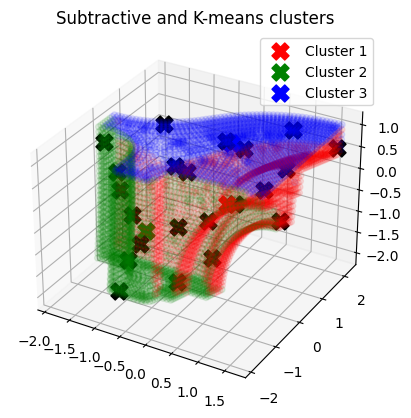

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.preprocessing as skp

ra = 0.5
rb = ra * 1.15
Eup = 0.5
Edown = 0.15
colors_options = 'rgb'
cluster_center = []

def set_colors(labels, colors=colors_options):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

# Read data from CSV
DataFrame = pd.read_csv(r"C:\alan\ITRI\Robot_Arm\output.csv", header=None)
DataMatrix = DataFrame.to_numpy()  # Use to_numpy() instead of as_matrix()

# Normalize the data
normalized_data_matrix = skp.scale(DataMatrix, axis=0)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3).fit(normalized_data_matrix)
labels = kmeans.labels_

# Get colors for the clusters
colors = set_colors(labels)
centroids = kmeans.cluster_centers_

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normalized_data_matrix[:, 0], normalized_data_matrix[:, 1], normalized_data_matrix[:, 2], c=colors, alpha=0.1)
# Plot K-means cluster centroids
for idx, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], centroid[2], c=colors_options[idx], s=150, marker='X', label='Cluster ' + str(idx + 1))

# Print data summary
print('Summary of the data set')
print(DataFrame.describe(), '\n')

print('K-means cluster centers')
print('c1 = {} \nc2 = {} \nc3 = {}'.format(kmeans.cluster_centers_[0],
                                         kmeans.cluster_centers_[1],
                                         kmeans.cluster_centers_[2]))

# Initialize potentials for Subtractive Clustering
size = len(normalized_data_matrix)
potential = [0.0] * size
for i in range(size):
    Xi = normalized_data_matrix[i]
    for j in range(i + 1, size):
        Xj = normalized_data_matrix[j]
        value = np.exp(-4.0 * ((Xi[0] - Xj[0]) ** 2 + (Xi[1] - Xj[1]) ** 2 + (Xi[2] - Xj[2]) ** 2) / (ra / 2) ** 2)
        potential[i] += value
        potential[j] += value
max_potential_value = max(potential)  # p1
max_potential_index = potential.index(max_potential_value)

# Filter through accept and reject criteria
current_max_value = max_potential_value
criteria = 1
while criteria and current_max_value:
    criteria = 0
    max_potential_vector = normalized_data_matrix[max_potential_index]  # x1
    potential_ratio = current_max_value / max_potential_value  # Pk and MaxPValue

    if potential_ratio > Eup:
        criteria = 1
    elif potential_ratio > Edown:
        dmin = np.min([(max_potential_vector[0] - cc[0]) ** 2 + (max_potential_vector[1] - cc[1]) ** 2 +
                       (max_potential_vector[2] - cc[2]) ** 2 for cc in cluster_center])
        if ((dmin / ra) + potential_ratio) >= 1:
            criteria = 1
        else:
            criteria = 2
    elif potential_ratio < Edown:
        break

    if criteria == 1:
        cluster_center.append(max_potential_vector)
        for i in range(size):
            Xj = normalized_data_matrix[i]
            potential_value = potential[i]
            potential_value = potential_value - (current_max_value * np.exp(-4.0 *
                                                ((max_potential_vector[0] - Xj[0]) ** 2 +
                                                (max_potential_vector[1] - Xj[1]) ** 2 +
                                                (max_potential_vector[2] - Xj[2]) ** 2)) / (rb / 2) ** 2)
            if potential_value < 0:
                potential_value = 0
            potential[i] = potential_value
        current_max_value = max(potential)  # p1
        max_potential_index = potential.index(current_max_value)
    elif criteria == 2:
        potential[max_potential_index] = 0
        current_max_value = max(potential)  # p1
        max_potential_index = potential.index(current_max_value)

print('Subtractive cluster centers')
print('c1 = {} \nc2 = {} \nc3 = {}'.format(cluster_center[0],
                                           cluster_center[1],
                                           cluster_center[2]))

# Plot centers produced by Subtractive Clustering
# Plot centers produced by Subtractive Clustering
for idx, centroid in enumerate(cluster_center):
    ax.scatter(centroid[0], centroid[1], centroid[2], c='k', s=150, marker='X')
plt.title('Subtractive and K-means clusters')
ax.legend()
plt.show()

C:\Users\sw_ya\AppData\Local\Temp\ipykernel_8900\1736104747.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



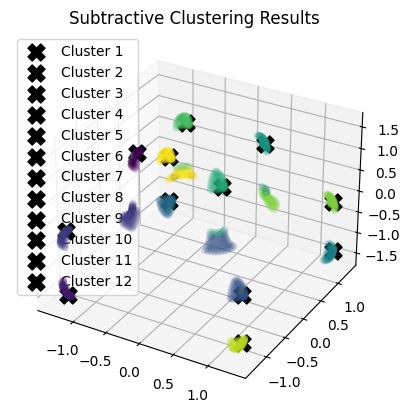

Subtractive cluster centers
c1 = [-0.58518375 -0.5847292   1.56175375 -0.10771976]
c2 = [-1.25696894 -1.25595711 -1.53730745 -0.35770937]
c3 = [-1.25696894 -1.25595711 -0.02230718 -0.55651243]
c4 = [ 1.32430188 -1.26716511 -0.23929166 -0.03510769]
c5 = [-1.26818625  1.3231724  -1.32032305 -0.03510752]
c6 = [ 1.32430188  1.2578622  -1.32032305 -0.05494006]
c7 = [0.5871523  0.65194466 1.34476954 0.09158191]
c8 = [ 0.65251686 -0.59593716  1.34476954  0.08454459]
c9 = [-0.59640101  0.65194466  1.34476954  0.24192745]
c10 = [ 1.25393642  1.3231724  -0.22004818 -0.03669198]
c11 = [ 1.32430188 -1.26216815 -1.33956669  0.16123976]
c12 = [-1.26318514  1.3231724  -0.22004818  0.16123983]


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.preprocessing as skp
import matplotlib.cm as cm

ra = 0.3
rb = ra * 1.15
Eup = 0.4
Edown = 0.15
cluster_center = []

def set_colors(labels, n_clusters):
    cmap = cm.get_cmap('viridis', n_clusters)  # 使用'viridis'颜色映射
    return [cmap(label) for label in labels]

# 读取数据并归一化
DataFrame = pd.read_csv(r"C:\alan\ITRI\Robot_Arm\output.csv", header=None)
DataMatrix = DataFrame.to_numpy()
normalized_data_matrix = skp.scale(DataMatrix, axis=0)

# 初始化潜力值
size = len(normalized_data_matrix)
potential = [0.0] * size

# 计算初始潜力值
for i in range(size):
    Xi = normalized_data_matrix[i]
    for j in range(i + 1, size):
        Xj = normalized_data_matrix[j]
        value = np.exp(-4.0 * ((Xi[0] - Xj[0]) ** 2 + (Xi[1] - Xj[1]) ** 2 + (Xi[2] - Xj[2]) ** 2) / (ra / 2) ** 2)
        potential[i] += value
        potential[j] += value

max_potential_value = max(potential)  # p1
max_potential_index = potential.index(max_potential_value)

# 减法聚类算法
current_max_value = max_potential_value
criteria = 1
while criteria and current_max_value:
    criteria = 0
    max_potential_vector = normalized_data_matrix[max_potential_index]  # x1
    potential_ratio = current_max_value / max_potential_value  # Pk and MaxPValue

    if potential_ratio > Eup:
        criteria = 1
    elif potential_ratio > Edown:
        dmin = np.min([(max_potential_vector[0] - cc[0]) ** 2 + (max_potential_vector[1] - cc[1]) ** 2 +
                       (max_potential_vector[2] - cc[2]) ** 2 for cc in cluster_center])
        if ((dmin / ra) + potential_ratio) >= 1:
            criteria = 1
        else:
            criteria = 2
    elif potential_ratio < Edown:
        break

    if criteria == 1:
        cluster_center.append(max_potential_vector)
        for i in range(size):
            Xj = normalized_data_matrix[i]
            potential_value = potential[i]
            potential_value = potential_value - (current_max_value * np.exp(-4.0 *
                                                ((max_potential_vector[0] - Xj[0]) ** 2 +
                                                (max_potential_vector[1] - Xj[1]) ** 2 +
                                                (max_potential_vector[2] - Xj[2]) ** 2)) / (rb / 2) ** 2)
            if potential_value < 0:
                potential_value = 0
            potential[i] = potential_value
        current_max_value = max(potential)  # p1
        max_potential_index = potential.index(current_max_value)
    elif criteria == 2:
        potential[max_potential_index] = 0
        current_max_value = max(potential)  # p1
        max_potential_index = potential.index(current_max_value)

# 为每个点分配簇标签（基于减法聚类中心）
labels = []
for point in normalized_data_matrix:
    distances = [np.linalg.norm(point - center) for center in cluster_center]
    labels.append(np.argmin(distances))

# 获取基于减法聚类结果的颜色
colors = set_colors(labels, len(cluster_center))

# 绘制减法聚类结果
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(normalized_data_matrix[:, 0], normalized_data_matrix[:, 1], normalized_data_matrix[:, 2], c=colors, alpha=0.1)

# 绘制减法聚类的中心点
for idx, centroid in enumerate(cluster_center):
    ax.scatter(centroid[0], centroid[1], centroid[2], c='k', s=150, marker='X', label='Cluster ' + str(idx + 1))

plt.title('Subtractive Clustering Results')
ax.legend()
plt.show()

print('Subtractive cluster centers')
for idx, center in enumerate(cluster_center):
    print(f'c{idx + 1} = {center}')

In [86]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np



# 创建 3D 散点图
fig = go.Figure()

# 为每个簇定义颜色
unique_labels = np.unique(labels)
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow',
    'black', 'brown', 'pink', 'gray', 'lime', 'teal', 'navy', 'maroon',
    'olive', 'aqua', 'silver', 'gold', 'plum', 'coral', 'salmon', 'khaki',
    'tan', 'orchid', 'indigo', 'darkgreen', 'crimson', 'turquoise'
]
# colors = set_colors(labels, len(cluster_center))
# 确保颜色列表足够长
if len(unique_labels) > len(colors):
    print("Warning: The number of clusters exceeds the number of available colors.")

# 绘制每个簇的数据点
for label in unique_labels:
    cluster_points = DataMatrix[labels == label]
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=5, color=colors[label % len(colors)], opacity=0.5),  # 使用取模运算以避免超出颜色列表
        name=f'Cluster {label + 1}'
    ))



# 设置图形标题和轴标签
fig.update_layout(
    title='Subtractive Clustering Results',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

# 显示图形
fig.show()

In [84]:
import igl
import csv

# input_path = r"C:\alan\ITRI\Robot_Arm\input_obj\fandisk.obj"
input_path=r"C:\alan\ITRI\Robot_Arm\input_obj\Part7.obj"
# 讀取三角形網格
v, f = igl.read_triangle_mesh(input_path)

# 計算主曲率
v1, v2, k1, k2 = igl.principal_curvature(v, f)

# 計算平均曲率和高斯曲率
h = (k1 + k2) / 2  # 平均曲率
g = k1 * k2  # 高斯曲率


# 計算頂點法向量
normals = igl.per_vertex_normals(v, f)

# 準備寫入 CSV 的數據
data = []
for i, vertex in enumerate(v):
    # Combine position, normal, and principal curvatures into one list
    # row = list(vertex) + list(normals[i]) + [h[i], g[i]]
    row = list(vertex) + [h[i]]
    data.append(row)

# 寫入 CSV 文件
with open('output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # # 寫入標題
    # writer.writerow(['x', 'y', 'z', 'nx', 'ny', 'nz', 'k1', 'k2'])
    # 寫入數據行
    writer.writerows(data)

print("Data has been saved to output.csv")

Data has been saved to output.csv
